In [1]:
# Import necessary libraries and set up warnings
import warnings
warnings.filterwarnings('ignore')

# Import data manipulation and visualization libraries
%matplotlib inline
from datetime import datetime
import pandas as pd
import pandas_datareader.data as web

# Replace pyfinance.ols.PandasRollingOLS (no longer maintained)
from statsmodels.regression.rolling import RollingOLS
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting style and index slicing
sns.set_style('whitegrid')
idx = pd.IndexSlice

In [2]:
from google.colab import drive
import shutil
import os

# Mount Google Drive if not already mounted
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')

# Define source and destination paths
source_path = '/content/drive/MyDrive/ML4T/assets.h5'
destination_path = '/content/assets.h5'

# Copy the file
try:
    shutil.copy(source_path, destination_path)
    print(f"File successfully copied from {source_path} to {destination_path}")
except FileNotFoundError:
    print(f"Error: The file was not found at {source_path}")
    print("Please check if the path is correct and the file exists.")
except PermissionError:
    print("Error: Permission denied. Unable to copy the file.")
    print("Please check your file permissions.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# Verify if the file exists in the destination
if os.path.exists(destination_path):
    print(f"File exists at {destination_path}")
    print(f"File size: {os.path.getsize(destination_path)} bytes")
else:
    print(f"File does not exist at {destination_path}")

Mounted at /content/drive
File successfully copied from /content/drive/MyDrive/ML4T/assets.h5 to /content/assets.h5
File exists at /content/assets.h5
File size: 1545439937 bytes


In [3]:
import h5py
import pandas as pd

DATA_STORE = '/content/assets.h5'

# Examine the structure of the HDF5 file
with h5py.File(DATA_STORE, 'r') as hdf:
    def print_structure(name, obj):
        print(name)
        if isinstance(obj, h5py.Dataset):
            print(f"  Shape: {obj.shape}, Type: {obj.dtype}")

    hdf.visititems(print_structure)

# Try to read data using pandas
with pd.HDFStore(DATA_STORE) as store:
    print("\nKeys in the pandas HDFStore:")
    print(store.keys())

    # Try to read a sample of data from each key
    for key in store.keys():
        try:
            sample = store.select(key, start=0, stop=5)
            print(f"\nSample from {key}:")
            print(sample)
        except Exception as e:
            print(f"Error reading {key}: {e}")

fred
fred/assets
fred/assets/axis0
  Shape: (4,), Type: |S35
fred/assets/axis1
  Shape: (6407,), Type: int64
fred/assets/block0_items
  Shape: (4,), Type: |S35
fred/assets/block0_values
  Shape: (6407, 4), Type: float64
quandl
quandl/wiki
quandl/wiki/prices
quandl/wiki/prices/axis0
  Shape: (12,), Type: |S11
quandl/wiki/prices/axis1_label0
  Shape: (15389314,), Type: int16
quandl/wiki/prices/axis1_label1
  Shape: (15389314,), Type: int16
quandl/wiki/prices/axis1_level0
  Shape: (14277,), Type: int64
quandl/wiki/prices/axis1_level1
  Shape: (3199,), Type: |S5
quandl/wiki/prices/block0_items
  Shape: (12,), Type: |S11
quandl/wiki/prices/block0_values
  Shape: (15389314, 12), Type: float64
quandl/wiki/stocks
quandl/wiki/stocks/axis0
  Shape: (1,), Type: |S4
quandl/wiki/stocks/axis1
  Shape: (3199,), Type: |S5
quandl/wiki/stocks/block0_items
  Shape: (1,), Type: |S4
quandl/wiki/stocks/block0_values
  Shape: (1,), Type: object
sp500
sp500/fred
sp500/fred/axis0
  Shape: (1,), Type: |S5
sp500

In [4]:
import pandas as pd
import numpy as np

DATA_STORE = '/content/assets.h5'
START = pd.Timestamp('2000-01-01')
END = pd.Timestamp('2018-12-31')

try:
    with pd.HDFStore(DATA_STORE) as store:
        # Load entire price data
        prices = store.select('quandl/wiki/prices')

        # Load stock data, selecting only required columns
        stocks = store.select('us_equities/stocks')

    # Process price data
    prices = prices.loc[(prices.index.get_level_values('date') >= START) &
                        (prices.index.get_level_values('date') <= END)]
    prices = prices['adj_close'].unstack('ticker')

    # Process stock data
    stocks = stocks[['market cap', 'ipo year', 'sector']]
    stocks = stocks.rename(columns={
        'market cap': 'marketcap',
        'ipo year': 'ipoyear'
    })

    print("Price data info:")
    print(prices.info())

    print("\nStock data info:")
    print(stocks.info())

    # Display a sample of the data
    print("\nSample of price data:")
    print(prices.head())

    print("\nSample of stock data:")
    print(stocks.head())

    # Check for missing data
    print("\nMissing data in prices:")
    print(prices.isnull().sum().sum())

    print("\nMissing data in stocks:")
    print(stocks.isnull().sum())

except KeyError as e:
    print(f"Error: Unable to find the specified key in the HDF store. {e}")
    print("Please check the structure of the HDF file.")
except Exception as e:
    print(f"An unexpected error occurred while loading the data: {e}")

Price data info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4706 entries, 2000-01-03 to 2018-03-27
Columns: 3199 entries, A to ZUMZ
dtypes: float64(3199)
memory usage: 114.9 MB
None

Stock data info:
<class 'pandas.core.frame.DataFrame'>
Index: 7071 entries, AAMC to ZYXI
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   marketcap  6657 non-null   float64
 1   ipoyear    3988 non-null   float64
 2   sector     6537 non-null   object 
dtypes: float64(2), object(1)
memory usage: 221.0+ KB
None

Sample of price data:
ticker              A  AA  AAL  AAMC       AAN  AAOI      AAON  AAP      AAPL  \
date                                                                            
2000-01-03  49.121329 NaN  NaN   NaN  4.975857   NaN  1.025920  NaN  3.596463   
2000-01-04  45.369006 NaN  NaN   NaN  4.958913   NaN  1.068476  NaN  3.293170   
2000-01-05  41.998737 NaN  NaN   NaN  4.958913   NaN  1.073796  NaN  3.341362   

In [5]:
# Keep data with stock info
# Remove stocks duplicates and align index names for later joining
stocks = stocks[~stocks.index.duplicated()]
stocks.index.name = 'ticker'

# Get tickers with both price information and metadata
shared = prices.columns.intersection(stocks.index)

# Filter stocks and prices to keep only shared tickers
stocks = stocks.loc[shared, :]
prices = prices.loc[:, shared]

print("Stocks data shape:", stocks.shape)
print("Prices data shape:", prices.shape)

# Verify that the number of tickers in prices matches the number of stocks
assert prices.shape[1] == stocks.shape[0]

Stocks data shape: (1763, 3)
Prices data shape: (4706, 1763)


Data shape after calculating returns: (303131, 6)

Sample of return data:
                   return_1m  return_2m  return_3m  return_6m  return_9m  \
ticker date                                                                
A      2001-01-31  -0.003653   0.022360   0.056104   0.049811  -0.052500   
AAN    2001-01-31   0.116071   0.008439  -0.015687  -0.009856  -0.002912   
AAON   2001-01-31   0.300170   0.034296   0.028670  -0.006238   0.010159   
AAPL   2001-01-31   0.406213   0.144685   0.033941  -0.132736  -0.110514   
ABCB   2001-01-31   0.146667   0.099973   0.051183   0.033038   0.013577   

                   return_12m  
ticker date                    
A      2001-01-31   -0.015988  
AAN    2001-01-31   -0.009572  
AAON   2001-01-31    0.031027  
AAPL   2001-01-31   -0.070339  
ABCB   2001-01-31    0.008858  

Summary statistics of return data:
           return_1m      return_2m      return_3m      return_6m  \
count  303131.000000  303131.000000  303131.000000  303131.00000

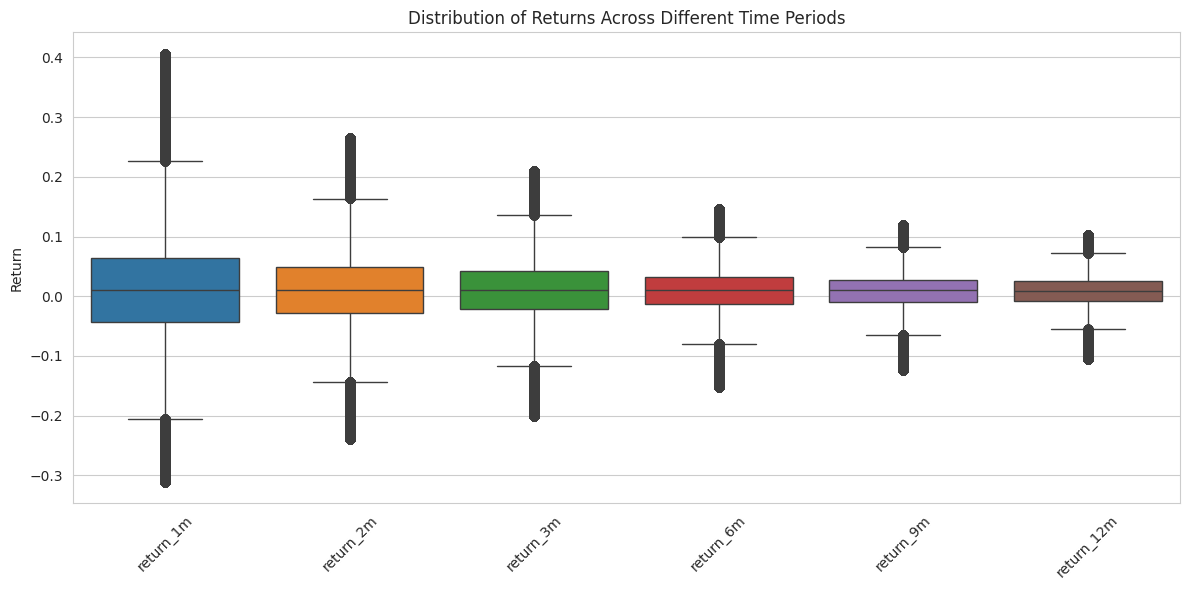

In [6]:
# Convert daily prices to monthly end-of-month prices
monthly_prices = prices.resample('M').last()

# Initialize an empty DataFrame to store our engineered features
data = pd.DataFrame()

# Define the lag periods (in months) for which we'll calculate returns
lags = [1, 2, 3, 6, 9, 12]

# Set the cutoff for winsorization (handling outliers)
outlier_cutoff = 0.01

# Loop through each lag period to calculate returns
for lag in lags:
    # Calculate the return for the current lag period
    data[f'return_{lag}m'] = (
        # Start with monthly prices
        monthly_prices
        # Calculate percentage change over the lag period
        .pct_change(lag)
        # Convert wide format (dates as index, tickers as columns) to long format
        .stack()
        # Apply winsorization to handle outliers
        .pipe(lambda x: x.clip(
            # Set lower bound at the 1st percentile
            lower=x.quantile(outlier_cutoff),
            # Set upper bound at the 99th percentile
            upper=x.quantile(1-outlier_cutoff)
        ))
        # Add 1 to convert returns to gross returns
        .add(1)
        # Take the nth root to annualize returns (n = lag)
        .pow(1/lag)
        # Subtract 1 to convert back to net returns
        .sub(1)
    )

# Reorganize the DataFrame:
# - Swap levels to have ticker as the first level of the MultiIndex
# - Remove any rows with missing values
data = data.swaplevel().dropna()

# Print information about the resulting DataFrame
print("Data shape after calculating returns:", data.shape)
print("\nSample of return data:")
print(data.head())

# Display summary statistics of the return data
print("\nSummary statistics of return data:")
print(data.describe())

# Check for any remaining missing values
print("\nMissing values in return data:")
print(data.isnull().sum())

# Optionally, visualize the distribution of returns
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.title("Distribution of Returns Across Different Time Periods")
plt.ylabel("Return")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Data shape after filtering for stocks with 10+ years of data: (278980, 6)

Number of unique tickers: 1414

Correlation matrix of returns:
            return_1m  return_2m  return_3m  return_6m  return_9m  return_12m
return_1m    1.000000   0.651495   0.516282   0.359756   0.285746    0.241939
return_2m    0.651495   1.000000   0.767115   0.518516   0.402984    0.340180
return_3m    0.516282   0.767115   1.000000   0.651917   0.502237    0.422792
return_6m    0.359756   0.518516   0.651917   1.000000   0.763550    0.628463
return_9m    0.285746   0.402984   0.502237   0.763550   1.000000    0.817424
return_12m   0.241939   0.340180   0.422792   0.628463   0.817424    1.000000


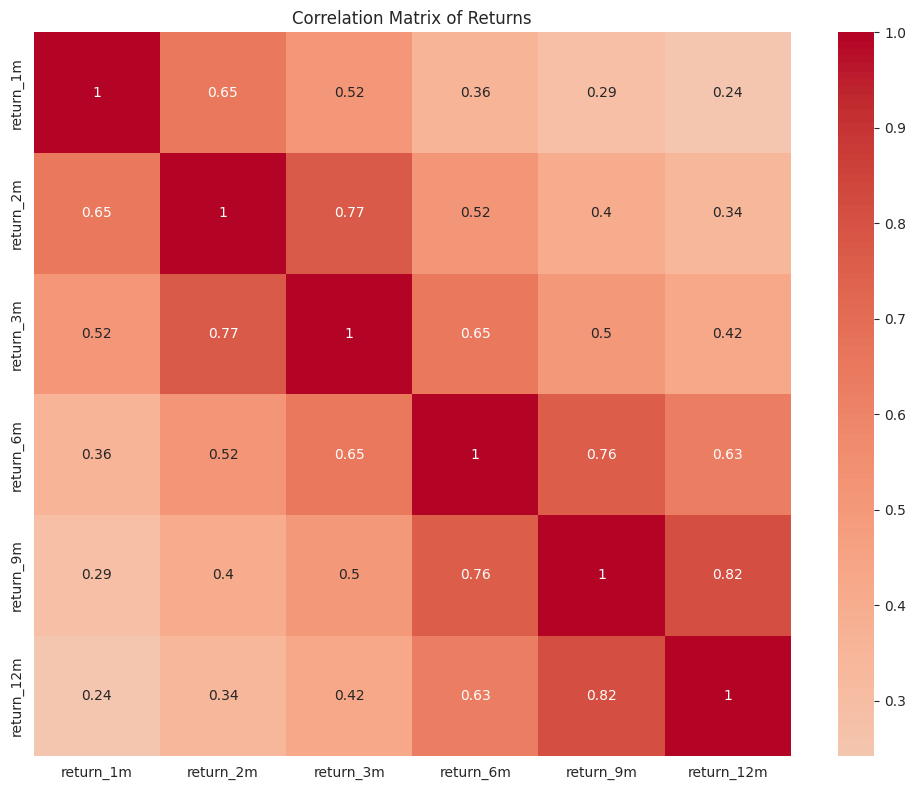

In [7]:
# Drop stocks with less than 10 years of returns
min_obs = 120  # 10 years * 12 months
nobs = data.groupby(level='ticker').size()
keep = nobs[nobs > min_obs].index

data = data.loc[idx[keep, :], :]

print("Data shape after filtering for stocks with 10+ years of data:", data.shape)
print("\nNumber of unique tickers:", data.index.get_level_values('ticker').nunique())

# Display correlation matrix of returns
corr_matrix = data.corr('spearman')
print("\nCorrelation matrix of returns:")
print(corr_matrix)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix of Returns")
plt.tight_layout()
plt.show()

# Fama-French Five-Factor Model

The Fama-French Five-Factor Model is an extension of the earlier Three-Factor Model, designed to explain stock returns. The five factors are:

## 1. Market Risk (Mkt-RF)

This factor represents the excess return of the market portfolio over the risk-free rate.

$Mkt-RF = R_m - R_f$

Where:
- $R_m$ is the return of the market portfolio
- $R_f$ is the risk-free rate

This factor captures the idea that stocks which are more sensitive to market movements should offer higher expected returns.

## 2. Size (SMB - Small Minus Big)

SMB represents the return spread between small-cap and large-cap stocks.

$SMB = \frac{1}{3}(SmallValue + SmallNeutral + SmallGrowth) - \frac{1}{3}(BigValue + BigNeutral + BigGrowth)$

This factor is based on the observation that smaller companies tend to outperform larger ones over the long term, possibly due to increased risk or less analyst coverage.

## 3. Value (HML - High Minus Low)

HML represents the return spread between value stocks (high book-to-market ratio) and growth stocks (low book-to-market ratio).

$HML = \frac{1}{2}(SmallValue + BigValue) - \frac{1}{2}(SmallGrowth + BigGrowth)$

This factor captures the tendency of value stocks to outperform growth stocks over the long term, possibly due to investor overreaction or higher risk associated with distressed companies.

## 4. Profitability (RMW - Robust Minus Weak)

RMW represents the return spread between stocks of companies with robust (high) profitability and those with weak (low) profitability.

$RMW = \frac{1}{2}(SmallRobust + BigRobust) - \frac{1}{2}(SmallWeak + BigWeak)$

Profitability is typically measured by metrics such as return on equity (ROE) or operating profits divided by book equity. This factor is based on the observation that more profitable firms tend to have higher returns.

## 5. Investment (CMA - Conservative Minus Aggressive)

CMA represents the return spread between stocks of companies with conservative and aggressive investment strategies.

$CMA = \frac{1}{2}(SmallConservative + BigConservative) - \frac{1}{2}(SmallAggressive + BigAggressive)$

Investment is typically measured by the growth in total assets. This factor is based on the observation that companies with lower investment rates (conservative) tend to have higher returns compared to companies with higher investment rates (aggressive).

The complete Fama-French Five-Factor Model for expected returns can be expressed as:

$E(R_i) - R_f = \beta_i(E(R_m) - R_f) + s_i \cdot E(SMB) + h_i \cdot E(HML) + r_i \cdot E(RMW) + c_i \cdot E(CMA)$

Where:
- $E(R_i)$ is the expected return on asset i
- $R_f$ is the risk-free rate
- $\beta_i, s_i, h_i, r_i, c_i$ are the factor loadings (sensitivities) for asset i
- $E(R_m) - R_f, E(SMB), E(HML), E(RMW), E(CMA)$ are the expected premiums for each factor

This model provides a more comprehensive framework for understanding the sources of stock returns and has been widely used in academic research and practical applications in finance.

In [8]:
# Calculate rolling factor betas
print("Calculating rolling factor betas...")

# Download Fama-French factors
import pandas_datareader.data as web

factors = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']
factor_data = web.DataReader('F-F_Research_Data_5_Factors_2x3', 'famafrench', start='2000')[0].drop('RF', axis=1)
factor_data.index = factor_data.index.to_timestamp()
factor_data = factor_data.resample('M').last().div(100)
factor_data.index.name = 'date'
factor_data.info()

Calculating rolling factor betas...
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 293 entries, 2000-01-31 to 2024-05-31
Freq: M
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  293 non-null    float64
 1   SMB     293 non-null    float64
 2   HML     293 non-null    float64
 3   RMW     293 non-null    float64
 4   CMA     293 non-null    float64
dtypes: float64(5)
memory usage: 13.7 KB


In [9]:
# Join factor data with returns
factor_data = factor_data.join(data['return_1m']).sort_index()
factor_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 278980 entries, ('A', Timestamp('2001-01-31 00:00:00')) to ('ZUMZ', Timestamp('2018-03-31 00:00:00'))
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Mkt-RF     278980 non-null  float64
 1   SMB        278980 non-null  float64
 2   HML        278980 non-null  float64
 3   RMW        278980 non-null  float64
 4   CMA        278980 non-null  float64
 5   return_1m  278980 non-null  float64
dtypes: float64(6)
memory usage: 13.9+ MB


In [10]:
# Calculate rolling betas
from statsmodels.regression.rolling import RollingOLS
import statsmodels.api as sm

T = 24
betas = (factor_data.groupby(level='ticker',
                             group_keys=False)
         .apply(lambda x: RollingOLS(endog=x.return_1m,
                                     exog=sm.add_constant(x.drop('return_1m', axis=1)),
                                     window=min(T, x.shape[0]-1))
                .fit(params_only=True)
                .params
                .drop('const', axis=1)))

In [11]:
betas.describe().join(betas.sum(1).describe().to_frame('total'))

,Mkt-RF,SMB,HML,RMW,CMA,total
count,246458.000000,246458.000000,246458.000000,246458.000000,246458.000000,278980.000000
mean,0.962930,0.607748,0.118008,-0.024474,0.031959,1.498440
std,0.874391,1.209433,1.501334,1.779227,2.034104,3.123929
min,-9.726615,-10.175758,-15.188114,-22.190282,-15.472450,-32.195709
25%,0.464518,-0.123828,-0.676353,-0.887687,-1.012106,0.000000
50%,0.918731,0.518800,0.088610,0.062197,0.052121,1.227138
75%,1.413462,1.265969,0.904783,0.936441,1.100428,3.091873
max,9.584191,9.976094,14.735980,13.287125,14.432324,29.967809


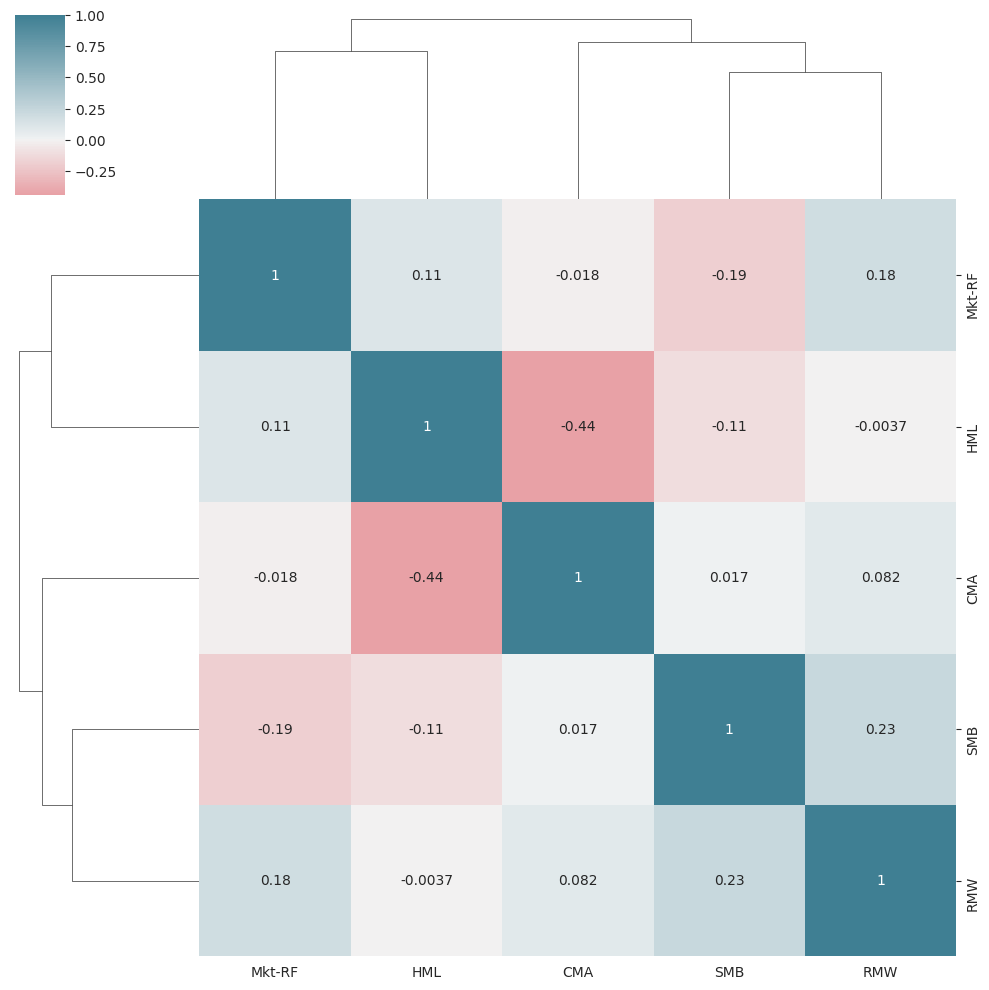

In [12]:
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.clustermap(betas.corr(), annot=True, cmap=cmap, center=0);

In [13]:
data.head()

return_1m  return_2m  return_3m  return_6m  return_9m  \
ticker date                                                                
A      2001-01-31  -0.003653   0.022360   0.056104   0.049811  -0.052500   
       2001-02-28  -0.311217  -0.189115  -0.116435  -0.084141  -0.076425   
       2001-03-31  -0.146389  -0.239967  -0.175116  -0.074628  -0.092690   
       2001-04-30   0.269444   0.040966  -0.105747  -0.028185  -0.004837   
       2001-05-31  -0.140220   0.044721  -0.023317  -0.071042  -0.064299   

                   return_12m  
ticker date                    
A      2001-01-31   -0.015988  
       2001-02-28   -0.084537  
       2001-03-31   -0.096606  
       2001-04-30   -0.066102  
       2001-05-31   -0.063425

In [18]:
data_save = data.copy()

In [17]:
betas.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 278980 entries, ('A', Timestamp('2001-01-31 00:00:00')) to ('ZUMZ', Timestamp('2018-03-31 00:00:00'))
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Mkt-RF  246458 non-null  float64
 1   SMB     246458 non-null  float64
 2   HML     246458 non-null  float64
 3   RMW     246458 non-null  float64
 4   CMA     246458 non-null  float64
dtypes: float64(5)
memory usage: 11.8+ MB


In [19]:
data = (data
        .join(betas
              .groupby(level='ticker')
              .shift()))
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 278980 entries, ('A', Timestamp('2001-01-31 00:00:00')) to ('ZUMZ', Timestamp('2018-03-31 00:00:00'))
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   return_1m   278980 non-null  float64
 1   return_2m   278980 non-null  float64
 2   return_3m   278980 non-null  float64
 3   return_6m   278980 non-null  float64
 4   return_9m   278980 non-null  float64
 5   return_12m  278980 non-null  float64
 6   Mkt-RF      245044 non-null  float64
 7   SMB         245044 non-null  float64
 8   HML         245044 non-null  float64
 9   RMW         245044 non-null  float64
 10  CMA         245044 non-null  float64
dtypes: float64(11)
memory usage: 32.6+ MB


In [21]:
# Impute mean for missing factor betas
for factor in factors:
    data[factor] = data.groupby('ticker')[factor].transform(lambda x: x.fillna(x.mean()))

# Check the result
print(data.info())

# Display the first few rows
print(data.head())

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 278980 entries, ('A', Timestamp('2001-01-31 00:00:00')) to ('ZUMZ', Timestamp('2018-03-31 00:00:00'))
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   return_1m   278980 non-null  float64
 1   return_2m   278980 non-null  float64
 2   return_3m   278980 non-null  float64
 3   return_6m   278980 non-null  float64
 4   return_9m   278980 non-null  float64
 5   return_12m  278980 non-null  float64
 6   Mkt-RF      278980 non-null  float64
 7   SMB         278980 non-null  float64
 8   HML         278980 non-null  float64
 9   RMW         278980 non-null  float64
 10  CMA         278980 non-null  float64
dtypes: float64(11)
memory usage: 32.6+ MB
None
                   return_1m  return_2m  return_3m  return_6m  return_9m  \
ticker date                                                                
A      2001-01-31  -0.003653   0.022360   0.056104   0.049811  -0.052

## Momentum factors

Momentum is a well-documented phenomenon in financial markets where assets that have performed well in the recent past tend to continue performing well in the near future, and vice versa. We can use these results to compute momentum factors based on the difference between returns over longer periods and the most recent monthly return, as well as for the difference between 3 and 12 month returns.

These momentum factors can provide additional insights into the potential future performance of assets and can be valuable predictors in our models.

                   return_1m  return_3m  return_12m  momentum_3  momentum_12  \
ticker date                                                                    
A      2001-01-31  -0.003653   0.056104   -0.015988    0.059757    -0.012335   
       2001-02-28  -0.311217  -0.116435   -0.084537    0.194782     0.226680   
       2001-03-31  -0.146389  -0.175116   -0.096606   -0.028727     0.049783   
       2001-04-30   0.269444  -0.105747   -0.066102   -0.375191    -0.335545   
       2001-05-31  -0.140220  -0.023317   -0.063425    0.116903     0.076795   

                   momentum_3_12  
ticker date                       
A      2001-01-31      -0.072092  
       2001-02-28       0.031898  
       2001-03-31       0.078511  
       2001-04-30       0.039645  
       2001-05-31      -0.040108  
          momentum_3    momentum_12  momentum_3_12
count  278980.000000  278980.000000  278980.000000
mean       -0.003689      -0.005381      -0.001692
std         0.091082       0.105240      

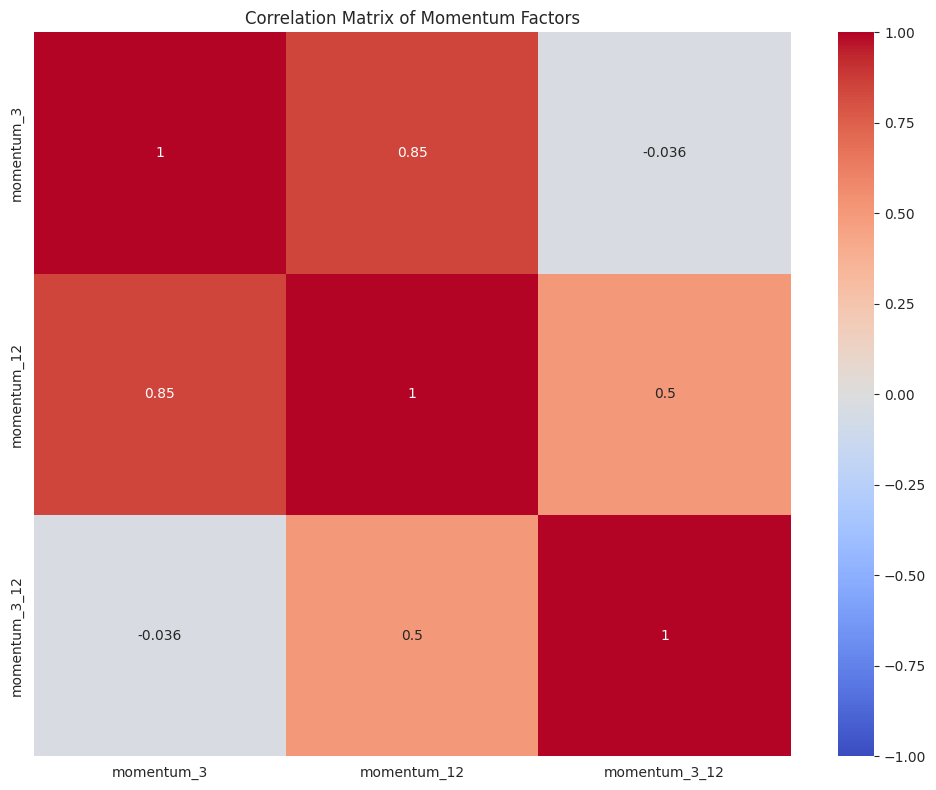

In [22]:
# Loop through different lag periods (2, 3, 6, 9, 12 months)
for lag in [2, 3, 6, 9, 12]:
    # Calculate the momentum factor for each lag period
    # This is done by subtracting the most recent 1-month return from the return over the lag period
    # The result represents the excess return over the lag period compared to the most recent month
    data[f'momentum_{lag}'] = data[f'return_{lag}m'].sub(data.return_1m)

# Calculate the momentum factor comparing 3-month and 12-month returns
# This represents the difference in returns between a longer-term (12-month) and medium-term (3-month) perspective
data['momentum_3_12'] = data['return_12m'].sub(data.return_3m)

# Display the first few rows of the dataframe to verify the new momentum columns
print(data[['return_1m', 'return_3m', 'return_12m', 'momentum_3', 'momentum_12', 'momentum_3_12']].head())

# Calculate and display basic statistics for the momentum factors
print(data[['momentum_3', 'momentum_12', 'momentum_3_12']].describe())

# Create a correlation matrix for the momentum factors
correlation_matrix = data[['momentum_3', 'momentum_12', 'momentum_3_12']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Optional: Visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Momentum Factors')
plt.tight_layout()
plt.show()

## Date Indicators

Date indicators can be useful features in financial models as they can capture seasonality and other time-based patterns in the data. We'll create year and month indicators from our date index to potentially capture these effects.

In [24]:
# Date Indicators
dates = data.index.get_level_values('date')
data['year'] = dates.year  # Extract year from the date index
data['month'] = dates.month  # Extract month from the date index

## Lagged returns

To use lagged values as input variables or features associated with the current observations, we use the .shift() method to move historical returns up to the current period:

In [25]:
# Lagged returns
for t in range(1, 7):
    # Create lagged return columns for the past 6 months
    data[f'return_1m_t-{t}'] = data.groupby(level='ticker').return_1m.shift(t)
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 278980 entries, ('A', Timestamp('2001-01-31 00:00:00')) to ('ZUMZ', Timestamp('2018-03-31 00:00:00'))
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   return_1m      278980 non-null  float64
 1   return_2m      278980 non-null  float64
 2   return_3m      278980 non-null  float64
 3   return_6m      278980 non-null  float64
 4   return_9m      278980 non-null  float64
 5   return_12m     278980 non-null  float64
 6   Mkt-RF         278980 non-null  float64
 7   SMB            278980 non-null  float64
 8   HML            278980 non-null  float64
 9   RMW            278980 non-null  float64
 10  CMA            278980 non-null  float64
 11  momentum_2     278980 non-null  float64
 12  momentum_3     278980 non-null  float64
 13  momentum_6     278980 non-null  float64
 14  momentum_9     278980 non-null  float64
 15  momentum_12    278980 non-null  float64
 16  

## Target: Holding Period Returns

Similarly, to compute returns for various holding periods, we use the normalized period returns computed previously and shift them back to align them with the current financial features

In [26]:
# Target: Holding Period Returns
for t in [1,2,3,6,12]:
    # Calculate target returns for different holding periods
    data[f'target_{t}m'] = data.groupby(level='ticker')[f'return_{t}m'].shift(-t)

# Display sample of the data to verify new columns
cols = ['target_1m',
        'target_2m',
        'target_3m',
        'return_1m',
        'return_2m',
        'return_3m',
        'return_1m_t-1',
        'return_1m_t-2',
        'return_1m_t-3']

print(data[cols].dropna().sort_index().head(10))



                   target_1m  target_2m  target_3m  return_1m  return_2m  \
ticker date                                                                
A      2001-04-30  -0.140220  -0.087246  -0.098192   0.269444   0.040966   
       2001-05-31  -0.031008  -0.076414  -0.075527  -0.140220   0.044721   
       2001-06-30  -0.119692  -0.097014  -0.155847  -0.031008  -0.087246   
       2001-07-31  -0.073750  -0.173364  -0.080114  -0.119692  -0.076414   
       2001-08-31  -0.262264  -0.083279   0.009593  -0.073750  -0.097014   
       2001-09-30   0.139130   0.181052   0.134010  -0.262264  -0.173364   
       2001-10-31   0.224517   0.131458   0.108697   0.139130  -0.083279   
       2001-11-30   0.045471   0.054962   0.045340   0.224517   0.181052   
       2001-12-31   0.064539   0.045275   0.070347   0.045471   0.131458   
       2002-01-31   0.026359   0.073264  -0.003306   0.064539   0.054962   

                   return_3m  return_1m_t-1  return_1m_t-2  return_1m_t-3  
ticker date

In [27]:
# Display information about the dataframe
print(data.info())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 278980 entries, ('A', Timestamp('2001-01-31 00:00:00')) to ('ZUMZ', Timestamp('2018-03-31 00:00:00'))
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   return_1m      278980 non-null  float64
 1   return_2m      278980 non-null  float64
 2   return_3m      278980 non-null  float64
 3   return_6m      278980 non-null  float64
 4   return_9m      278980 non-null  float64
 5   return_12m     278980 non-null  float64
 6   Mkt-RF         278980 non-null  float64
 7   SMB            278980 non-null  float64
 8   HML            278980 non-null  float64
 9   RMW            278980 non-null  float64
 10  CMA            278980 non-null  float64
 11  momentum_2     278980 non-null  float64
 12  momentum_3     278980 non-null  float64
 13  momentum_6     278980 non-null  float64
 14  momentum_9     278980 non-null  float64
 15  momentum_12    278980 non-null  float64
 16  

## Create age proxy

We use quintiles of IPO year as a proxy for company age.

In [28]:
# Create age proxy
data = (data
        .join(pd.qcut(stocks.ipoyear, q=5, labels=list(range(1, 6)))
              .astype(float)
              .fillna(0)
              .astype(int)
              .to_frame('age')))
data.age = data.age.fillna(-1)

## Create dynamic size proxy

We use the marketcap information from the NASDAQ ticker info to create a size proxy.

In [29]:
# Display information about stocks DataFrame
stocks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1763 entries, A to ZUMZ
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   marketcap  1763 non-null   float64
 1   ipoyear    800 non-null    float64
 2   sector     1759 non-null   object 
dtypes: float64(2), object(1)
memory usage: 119.6+ KB


In [30]:
# Create size factor
size_factor = (monthly_prices
               .loc[data.index.get_level_values('date').unique(),
                    data.index.get_level_values('ticker').unique()]
               .sort_index(ascending=False)
               .pct_change()
               .fillna(0)
               .add(1)
               .cumprod())

# Display information about size_factor
size_factor.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207 entries, 2018-03-31 to 2001-01-31
Columns: 1414 entries, A to ZUMZ
dtypes: float64(1414)
memory usage: 2.2 MB


In [31]:
msize = (size_factor
         .mul(stocks
              .loc[size_factor.columns, 'marketcap'])).dropna(axis=1, how='all')

### Create Size indicator as deciles per period

Compute size deciles per month:

In [32]:
# Create size indicator as deciles per period
data['msize'] = (msize
                 .apply(lambda x: pd.qcut(x, q=10, labels=list(range(1, 11)))
                        .astype(int), axis=1)
                 .stack()
                 .swaplevel())
data.msize = data.msize.fillna(-1)

## Combine data

In [33]:
# Combine data
data = data.join(stocks[['sector']])
data.sector = data.sector.fillna('Unknown')

# Display information about the final DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 278980 entries, ('A', Timestamp('2001-01-31 00:00:00')) to ('ZUMZ', Timestamp('2018-03-31 00:00:00'))
Data columns (total 33 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   return_1m      278980 non-null  float64
 1   return_2m      278980 non-null  float64
 2   return_3m      278980 non-null  float64
 3   return_6m      278980 non-null  float64
 4   return_9m      278980 non-null  float64
 5   return_12m     278980 non-null  float64
 6   Mkt-RF         278980 non-null  float64
 7   SMB            278980 non-null  float64
 8   HML            278980 non-null  float64
 9   RMW            278980 non-null  float64
 10  CMA            278980 non-null  float64
 11  momentum_2     278980 non-null  float64
 12  momentum_3     278980 non-null  float64
 13  momentum_6     278980 non-null  float64
 14  momentum_9     278980 non-null  float64
 15  momentum_12    278980 non-null  float64
 16  

## Store data

We will use the data again in several later chapters, starting in Chapter 7 on Linear Models.

In [35]:
# Store data
with pd.HDFStore(DATA_STORE) as store:
    store.put('engineered_features', data.sort_index().loc[idx[:, :datetime(2018, 3, 1)], :])
    print(store.info())

<class 'pandas.io.pytables.HDFStore'>
File path: /content/assets.h5
/engineered_features            frame        (shape->[277566,33])  
/fred/assets                    frame        (shape->[6407,4])     
/quandl/wiki/prices             frame        (shape->[15389314,12])
/quandl/wiki/stocks             frame        (shape->[1,1])        
/sp500/fred                     frame        (shape->[2609,1])     
/sp500/stocks                   frame        (shape->[503,6])      
/sp500/stooq                    frame        (shape->[17700,5])    
/us_equities/stocks             frame        (shape->[7071,10])    


## Create Dummy variables

For most models, we need to encode categorical variables as 'dummies' (one-hot encoding):

In [36]:
# Create dummy variables
dummy_data = pd.get_dummies(data,
                            columns=['year','month', 'msize', 'age',  'sector'],
                            prefix=['year','month', 'msize', 'age', ''],
                            prefix_sep=['_', '_', '_', '_', ''])
dummy_data = dummy_data.rename(columns={c:c.replace('.0', '') for c in dummy_data.columns})
dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 278980 entries, ('A', Timestamp('2001-01-31 00:00:00')) to ('ZUMZ', Timestamp('2018-03-31 00:00:00'))
Data columns (total 87 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   return_1m               278980 non-null  float64
 1   return_2m               278980 non-null  float64
 2   return_3m               278980 non-null  float64
 3   return_6m               278980 non-null  float64
 4   return_9m               278980 non-null  float64
 5   return_12m              278980 non-null  float64
 6   Mkt-RF                  278980 non-null  float64
 7   SMB                     278980 non-null  float64
 8   HML                     278980 non-null  float64
 9   RMW                     278980 non-null  float64
 10  CMA                     278980 non-null  float64
 11  momentum_2              278980 non-null  float64
 12  momentum_3              278980 non-null  float64
 13  

In [37]:
from google.colab import drive
import shutil

# Mount Google Drive if not already mounted
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')

# Define source and destination paths
source_path = '/content/assets.h5'
destination_path = '/content/drive/MyDrive/ML4T/assets.h5'

# Copy the file, overwriting the existing file in Google Drive
shutil.copy(source_path, destination_path)

print(f"File updated: {destination_path}")

# Verify the file was updated
import os
file_stats = os.stat(destination_path)
print(f"File size: {file_stats.st_size} bytes")

File updated: /content/drive/MyDrive/ML4T/assets.h5
File size: 1617016760 bytes
Last modified: 1721974028.0


In [38]:
from datetime import datetime

# Get the last modified timestamp
last_modified = os.path.getmtime('/content/drive/MyDrive/ML4T/assets.h5')

# Convert the timestamp to a datetime object
last_modified_datetime = datetime.fromtimestamp(last_modified)

# Format the datetime object as a string
last_modified_str = last_modified_datetime.strftime("%Y-%m-%d %H:%M:%S")

print(f"File last modified on: {last_modified_str}")

File last modified on: 2024-07-26 06:07:08
